In [8]:
import os
import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

ImportError: attempted relative import with no known parent package

In [2]:
from data import Dataloader
from models import RandomExampleModel
from models import TwoClustersMIP
import metrics

In [3]:
# Loading the data
data_loader = Dataloader("../data/dataset_4") # Specify path to the dataset you want to load
X, Y = data_loader.load()
X,Y = X[:400], Y[:400]

In [4]:
# Let's train an example model
model = RandomExampleModel() # Instantiation of the model with hyperparameters, if needed
model.fit(X, Y) # Training of the model, using preference data

In [5]:
# First, let's see how our model reconsiders our preferences
# Our data preferences were X[i] >> Y[i] for all i, let's see if our model agrees
print((model.predict_utility(X) - model.predict_utility(Y))[:5]) # Preferred item has a higher utility

# predict_utility returns utility of samples for each cluster, returning shape (n_samples, n_clusters)

[[ 0.13041627  0.06063838]
 [-0.15418204 -0.26035039]
 [-0.04504326 -0.17247457]
 [-0.18193225 -0.16863084]
 [ 0.00064373  0.00561195]]


In [6]:
# Or we can directly use the predict_preference method:
print(model.predict_preference(X, Y)[:5]) # For each cluster we see if X is preferred to Y (0) or the contrary (1)
# predict_preference returns preference of samples for each cluster, returning shape (n_samples, n_clusters)
# 0 means that the cluster prefers first argument (here X[i]), 1 means that the cluster prefers second argument (here Y[i])

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


In [7]:
# We consider that our model explains our data, if for at least one cluster, X[i] >> Y[i]
pairs_explained = np.sum(model.predict_preference(X, Y)[:5] == 0, axis=1) # For each sample check if each clusters prefers X[i] (then is True)
pairs_explained = pairs_explained > 0 # If at least one cluster prefers X[i], then X[i] >> Y[i] is explained
print("Percentage of explained preferences for 5 first samples:", np.sum(pairs_explained) / 5) # Get % or explained pairs

Percentage of explained preferences for 5 first samples: 0.6


In [8]:
# Or we call directly the right metric:
pairs_explained = metrics.PairsExplained()
print("Percentage of explained preferences for all samples:", pairs_explained.from_model(model, X, Y))
# Or other possibility:
print("Percentage of explained preferences for all samples:", pairs_explained(model.predict_utility(X), model.predict_utility(Y)))

Percentage of explained preferences for all samples: 0.545
Percentage of explained preferences for all samples: 0.545


In [9]:
# Now, we can also see how our model clusters our data
print(model.predict_cluster(X, Y)[:5]) # Returns for each sample which cluster is the most likely to have generated the preference.
# The most likely cluster is the one with the highest utility difference U(X[i])-U(Y[i]) for the sample.

[0 0 0 1 1]


In [12]:
# Ground truth are also provided:
Z = data_loader.get_ground_truth_labels()
Z = Z[:400]
# We can see how it compares to our model's predictions:
print(Z[:5])

[0 0 0 1 0]


In [13]:
# We have a metric to calculate how well the model has regrouped the preferences pairs compared to ground truth:
cluster_intersection = metrics.ClusterIntersection()

print("Cluster intersection for 5 first samples:", cluster_intersection(model.predict_cluster(X, Y)[:5], Z[:5]))

# Then for all data:
print("Cluster intersection for all samples:", cluster_intersection(model.predict_cluster(X, Y), Z))
print("Cluster intersection for all samples:", cluster_intersection.from_model(model, X, Y, Z))

Cluster intersection for 5 first samples: 0.6
Cluster intersection for all samples: 0.676203007518797
Cluster intersection for all samples: 0.676203007518797


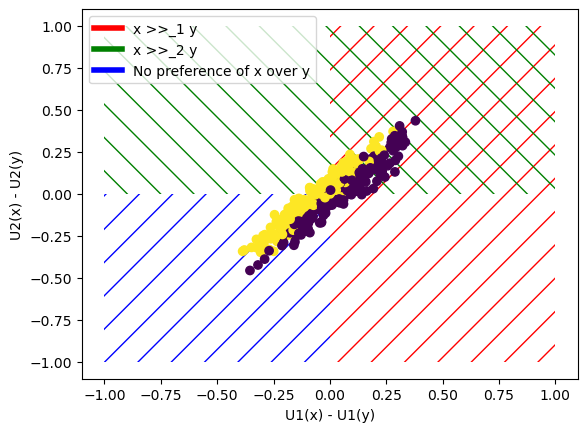

In [14]:
# Here is a proposition of a useful plot to see how the model clusters the data:
# We look at how each cluster evaluates U(x) - U(y) and color with ground truth clustering
# Note that x >>_1 y means that x is preferred to y for cluster 1
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

plt.figure()
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")

plt.gca().add_patch(Rectangle((0,-1.),1., 2.,
                    edgecolor='red',
                    facecolor='none',
                    lw=0, 
                    hatch='/'))
plt.gca().add_patch(Rectangle((-1.,0), 2., 1.,
                    edgecolor='green',
                    facecolor='none',
                    lw=0, 
                    hatch='\\'))
plt.gca().add_patch(Rectangle((-1.,-1.),1., 1.,
                    edgecolor='blue',
                    facecolor='none',
                    hatch='/',
                    lw=0))
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0], 
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1], c=Z)

custom_lines = [Line2D([0], [0], color="red", lw=4),
                Line2D([0], [0], color="green", lw=4),
                Line2D([0], [0], color="b", lw=4)]

plt.legend(custom_lines, ['x >>_1 y', "x >>_2 y ", 'No preference of x over y'])
plt.show()

Our random model cannot explain a large part of our preference data. Your first assigment will be to write a Mixed-Interger Programming algorithm that will be able to do so.

In [15]:
# This cell should work when you have completed the TwoClustersMIP model
from models import TwoClustersMIP

parameters = {"n_pieces": 5,"n_clusters":2} # Can be completed
model = TwoClustersMIP(**parameters)
model.fit(X, Y)


Set parameter WLSAccessID
Set parameter WLSSecret


Set parameter LicenseID to value 2468648
Academic license 2468648 - for non-commercial use only - registered to ax___@student-cs.fr
Set parameter Seed to value 123
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Academic license 2468648 - for non-commercial use only - registered to ax___@student-cs.fr
Optimize a model with 2042 rows, 4048 columns and 29608 nonzeros
Model fingerprint: 0x9377d67d
Variable types: 3248 continuous, 800 integer (800 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-03, 1e+02]
Found heuristic solution: objective 8.2546870
Presolve removed 400 rows and 2000 columns
Presolve time: 0.06s
Presolved: 1642 rows, 2048 columns, 25608 nonzeros
Variable types: 1648 conti

In [16]:
pairs_explained = metrics.PairsExplained()
print("Percentage of explained preferences on train data:", pairs_explained.from_model(model, X, Y)) # You should get 1.0 with the right MIP
print("Percentage of preferences well regrouped into clusters:", cluster_intersection.from_model(model, X, Y, Z))

Percentage of explained preferences on train data: 1.0
Percentage of preferences well regrouped into clusters: 0.9900250626566416


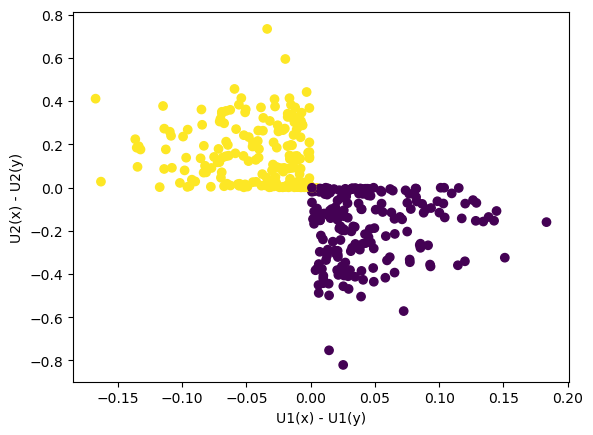

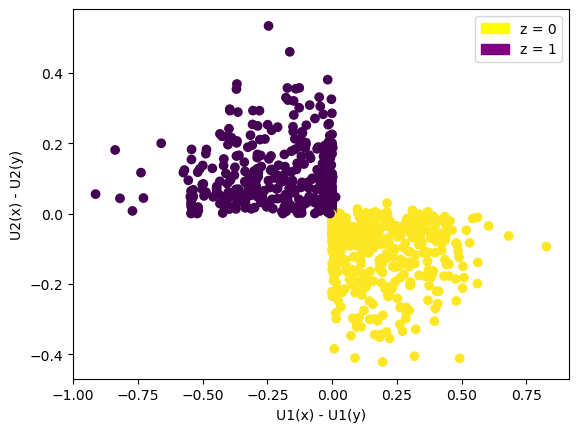

In [17]:
# As an example here are the results obtained with:
# Uncomment the code to check your results
plt.figure()
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0], 
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1], c=Z)
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")
plt.show()

# Here is how it should look like
# from IPython.display import Image
# Image("../images/MIP_results_example.png")

Your second assignement will be to find another model that will work well with larger data instances.

In [5]:
import os
import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

from data import Dataloader
from models import RandomExampleModel
from models import TwoClustersMIP
import metrics

data_loader = Dataloader("../data/dataset_10") 
X, Y = data_loader.load()
Z = data_loader.get_ground_truth_labels()

from models import HeuristicModel

all_models_dico = {}
for version in ["difference_KMeans_L2", "difference_AHC_cosine", "concatenation_KMeans_L2", "concatenation_AHC_cosine"]:
	for n_iterations in range(1,17):
		parameters = {"n_pieces": 5,"n_clusters":2, "clustering_method":version} 
		model = HeuristicModel(**parameters)
		model.fit(X, Y, n_iterations = n_iterations)
		all_models_dico[(version, n_iterations)] = model

		pairs_explained = metrics.PairsExplained()
		cluster_intersection = metrics.ClusterIntersection()
		if iteration == 1 or iteration == 16:
			print("-----------------------------------")
			print("Version:", version)
			print("Iteration:", iteration)
			print("Percentage of explained preferences on train data:", pairs_explained.from_model(model, X, Y)) 
			print("Percentage of preferences well regrouped into clusters:", cluster_intersection.from_model(model, X, Y, Z))

-----------------------------------
Version: difference_KMeans_L2_refined
Percentage of explained preferences on train data: 0.9985
Percentage of preferences well regrouped into clusters: 0.9950100050025013
-----------------------------------
Version: PCA
Percentage of explained preferences on train data: 0.9275
Percentage of preferences well regrouped into clusters: 0.9231615807903952
-----------------------------------
Version: difference_KMeans_L2
Percentage of explained preferences on train data: 0.9255
Percentage of preferences well regrouped into clusters: 0.9231615807903952
-----------------------------------
Version: difference_AHC_cosine
Percentage of explained preferences on train data: 0.9125
Percentage of preferences well regrouped into clusters: 0.8443721860930465
-----------------------------------
Version: concatenation_KMeans_L2
Percentage of explained preferences on train data: 0.9265
Percentage of preferences well regrouped into clusters: 0.919487743871936
-----------

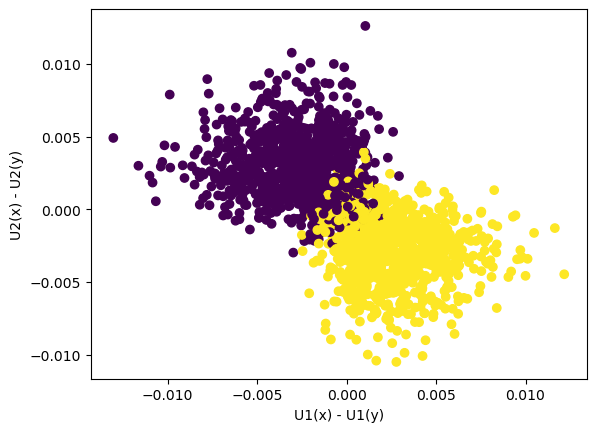

In [5]:
plt.figure()
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0], 
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1], c=Z)
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")
plt.show()